## Importing libraries

In [3]:
import os

# change to root directory
os.chdir("..")
print(os.getcwd())

/home/george/Desktop/python_projects/dbs_object_detection


In [145]:
# object detection and recoginition library
from deepface import DeepFace
from deepface.commons import functions as deepface_functions
from retinaface import RetinaFace
from retinaface.model.retinaface_model import build_model as retinaface_build_model
import retinaface.commons.postprocess as retinaface_postprocess
from tensorflow.keras.preprocessing import image

# python libaries
import glob
from typing import Union, Dict, List
import collections

#sklearn and numeric libraries 
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

#opencv library
import cv2

#plotting
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [107]:
def load_category_image_filepaths(root_dir:str="test_images")->Dict[str, List[str]]:
    """
    Given the root directory of images;
    1. read all directory names
    2. collect all image path (jpeg, png) within the directory
    """
    directories = os.listdir("test_images")
    category_image_filepaths= collections.defaultdict(list)
    
    for directory in directories:
        directory_filepath=os.path.join(root_dir, directory)
        for file in os.listdir(directory_filepath):
            full_filepath = os.path.join(directory_filepath, file)
            category_image_filepaths[directory].append(full_filepath)
            
    return dict(category_image_filepaths)        

category_image_filepaths = load_category_image_filepaths()
category_image_filepaths

{'Philip_Fernandez': ['test_images/Philip_Fernandez/Philip_Fernandez_1.jpeg',
  'test_images/Philip_Fernandez/Philip_Fernandez_2.jpeg',
  'test_images/Philip_Fernandez/Philip_Fernandez_3.jpeg'],
 'Sok_Hui': ['test_images/Sok_Hui/Sok_Hui_7.jpeg',
  'test_images/Sok_Hui/Sok_Hui_1.jpeg',
  'test_images/Sok_Hui/Sok_Hui_6.jpeg',
  'test_images/Sok_Hui/Sok_Hui_3.jpeg',
  'test_images/Sok_Hui/Sok_Hui_5.jpeg',
  'test_images/Sok_Hui/Sok_Hui_2.jpeg',
  'test_images/Sok_Hui/Sok_Hui_4.jpeg'],
 'Eng_Kwok ': ['test_images/Eng_Kwok /Eng_Kwok_6.jpeg',
  'test_images/Eng_Kwok /Eng_Kwok_2 .jpeg',
  'test_images/Eng_Kwok /Eng_Kwok_4.jpeg',
  'test_images/Eng_Kwok /Eng_Kwok_3.jpeg',
  'test_images/Eng_Kwok /Eng_Kwok_1 .jpeg',
  'test_images/Eng_Kwok /Eng_Kwok_5.jpeg'],
 'Tse_Koon': ['test_images/Tse_Koon/Tse_Koon_7.jpeg',
  'test_images/Tse_Koon/Tse_Koon_5.jpeg',
  'test_images/Tse_Koon/Tse_Koon_3.jpeg',
  'test_images/Tse_Koon/Tse_Koon_2.jpeg',
  'test_images/Tse_Koon/Tse_Koon_4.jpeg',
  'test_images/Ts

In [63]:
model_name="Facenet"
detector_backend="retinaface"

embedding_model=DeepFace.build_model(model_name)
detection_model = RetinaFace.build_model()

In [56]:
result = DeepFace.verify(category_image_filepaths['piyush'][0], category_image_filepaths['schooling'][2], model_name= model_name, detector_backend=detector_backend, normalization=model_name)
result

1/1 [==============================] - 0s 47ms/step


{'verified': False,
 'distance': 0.8176908377862777,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine'}

## Extracting representations
In this section, we will check if the embeddings method will work. We will extract the images embeddngs, PCA into 2d and plot the embeddings.

Conclusion is that embeddings method will work

1. For raw images, we will use DeepFace.represent
2. For normalized image, we ill just use the model.predict(img)[0]

In [57]:
labels = []
features = []


for category, image_filepaths in category_image_filepaths.items():
    print(f"Category: {category}")
    for image_filepath in image_filepaths:
        print(f"Image :{image_filepath}")
        labels.append(category)
        features.append(DeepFace.represent(image_filepath, model=embedding_model, detector_backend=detector_backend, align=True, normalization='Facenet'))


Category: Philip_Fernandez
Image :test_images/Philip_Fernandez/Philip_Fernandez_1.jpeg
1/1 [==============================] - 0s 37ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_2.jpeg
1/1 [==============================] - 0s 36ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_3.jpeg
1/1 [==============================] - 0s 37ms/step
Category: Sok_Hui
Image :test_images/Sok_Hui/Sok_Hui_7.jpeg
1/1 [==============================] - 0s 39ms/step
Image :test_images/Sok_Hui/Sok_Hui_1.jpeg
1/1 [==============================] - 0s 40ms/step
Image :test_images/Sok_Hui/Sok_Hui_6.jpeg
1/1 [==============================] - 0s 32ms/step
Image :test_images/Sok_Hui/Sok_Hui_3.jpeg
1/1 [==============================] - 0s 36ms/step
Image :test_images/Sok_Hui/Sok_Hui_5.jpeg
1/1 [==============================] - 0s 40ms/step
Image :test_images/Sok_Hui/Sok_Hui_2.jpeg
1/1 [==============================] - 0s 36ms/step
Image :test_images/Sok_Hui/Sok_Hui_4.jpeg
1/1 [========

<IPython.core.display.Javascript object>


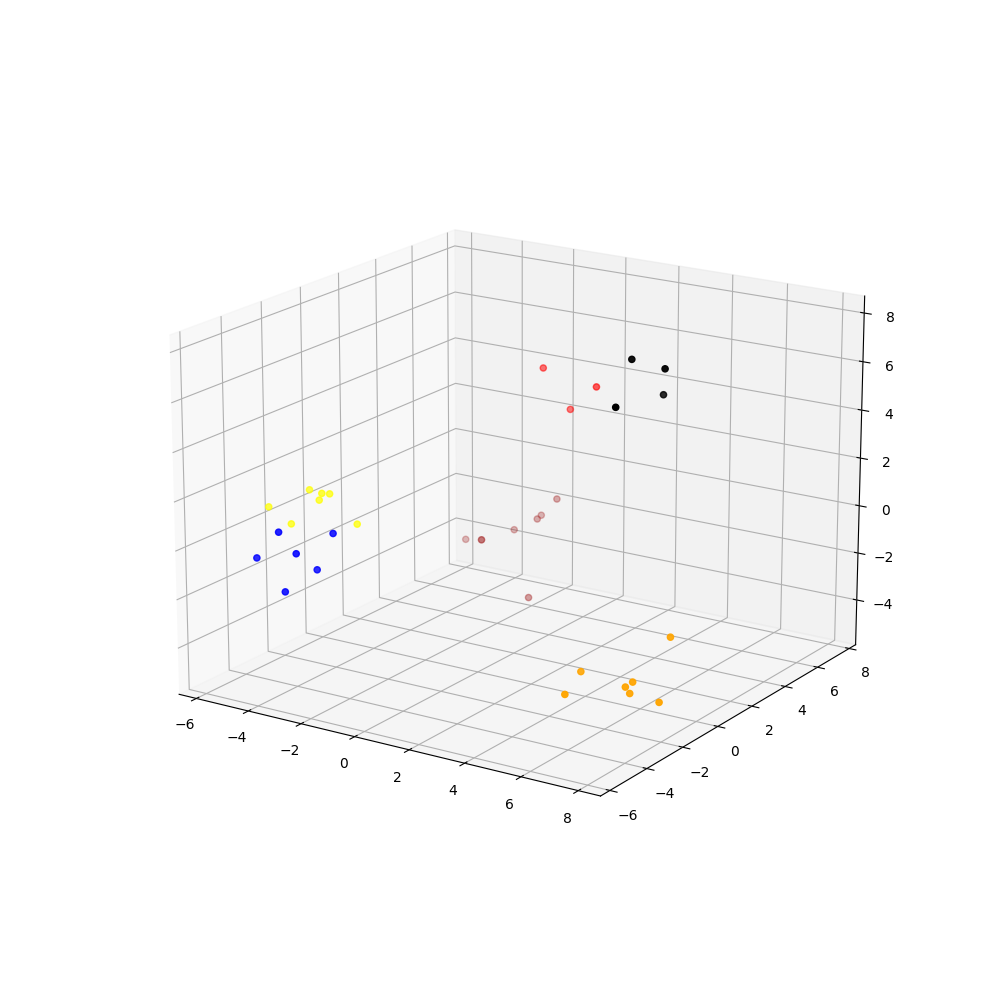

In [85]:
%matplotlib notebook
pca = PCA(n_components=3)
features_3d = pca.fit_transform(features)

c={"Philip_Fernandez":"red", "Sok_Hui":"yellow", "Eng_Kwok ":"blue", "Tse_Koon":"orange", "piyush":"brown", "schooling":"black"}
colors = [c[person] for person in labels]


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(features_3d[:,0], features_3d[:,1], features_3d[:,2], c=colors)

## Things to do 
1. object detection on video
2. create embeddings on anchor images
3. pairwise cosine similarity
4. generate video

In [108]:
def get_faces_embeddings(frame:np.ndarray, embedding_model, detector_backend):
    """
    process a image and returns the bbox coordinates and embeddings
    """
    detection_results = RetinaFace.detect_faces(frame, model=detector_backend)
    coordinates = []
    embeddings = []
    
                
    if type(detection_results) == dict: # source code shows that empty detection will return tuple
        for detection_result in detection_results.values():
            x1, y1, x2, y2 = detection_result["facial_area"]

            # alignment of face
            detected_face = frame[y1:y2, x1:x2].copy()
            left_eye = detection_result['landmarks']['left_eye']
            right_eye = detection_result['landmarks']['right_eye']
            nose = detection_result['landmarks']['nose']
            detected_face = retinaface_postprocess.alignment_procedure(detected_face, right_eye, left_eye, nose)


            # resizing to expected shape maintence aspect ratio and pad
            target_size = deepface_functions.find_input_shape(embedding_model)

            if detected_face.shape[0] > 0 and detected_face.shape[1] > 0:
                factor_0 = target_size[0] / detected_face.shape[0]
                factor_1 = target_size[1] / detected_face.shape[1]
                factor = min(factor_0, factor_1)

                dsize = (int(detected_face.shape[1] * factor), int(detected_face.shape[0] * factor))
                detected_face = cv2.resize(detected_face, dsize)

                diff_0 = target_size[0] - detected_face.shape[0]
                diff_1 = target_size[1] - detected_face.shape[1]

                detected_face = np.pad(detected_face, ((diff_0 // 2, diff_0 - diff_0 // 2), (diff_1 // 2, diff_1 - diff_1 // 2), (0, 0)), 'constant')

                if detected_face.shape[0:2] != target_size:
                    detected_face = cv2.resize(detected_face, target_size)

                detected_face = image.img_to_array(detected_face) #what this line doing? must?
                detected_face = np.expand_dims(detected_face, axis = 0)
                detected_face /= 255 #normalize input in [0, 1]

            # normalization
            detected_face = deepface_functions.normalize_input(detected_face, normalization='Facenet')

            embedding = embedding_model.predict(detected_face)[0]
            coordinates.append((x1, y1, x2, y2))
            embeddings.append(embedding)
            
    return coordinates, embeddings


In [109]:
labels_1 = []
features_1 = []

for category, image_filepaths in category_image_filepaths.items():
    print(f"Category: {category}")
    for image_filepath in image_filepaths:
        print(f"Image :{image_filepath}")
        labels_1.append(category)
        img = cv2.imread(image_filepath)
        coords, embeddings = get_faces_embeddings(img, embedding_model, detection_model)
        features_1.append(embeddings[0])


Category: Philip_Fernandez
Image :test_images/Philip_Fernandez/Philip_Fernandez_1.jpeg
1/1 [==============================] - 0s 36ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_2.jpeg
1/1 [==============================] - 0s 34ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_3.jpeg
1/1 [==============================] - 0s 37ms/step
Category: Sok_Hui
Image :test_images/Sok_Hui/Sok_Hui_7.jpeg
1/1 [==============================] - 0s 37ms/step
Image :test_images/Sok_Hui/Sok_Hui_1.jpeg
1/1 [==============================] - 0s 37ms/step
Image :test_images/Sok_Hui/Sok_Hui_6.jpeg
1/1 [==============================] - 0s 32ms/step
Image :test_images/Sok_Hui/Sok_Hui_3.jpeg
1/1 [==============================] - 0s 43ms/step
Image :test_images/Sok_Hui/Sok_Hui_5.jpeg
1/1 [==============================] - 0s 37ms/step
Image :test_images/Sok_Hui/Sok_Hui_2.jpeg
1/1 [==============================] - 0s 37ms/step
Image :test_images/Sok_Hui/Sok_Hui_4.jpeg
1/1 [========

<IPython.core.display.Javascript object>


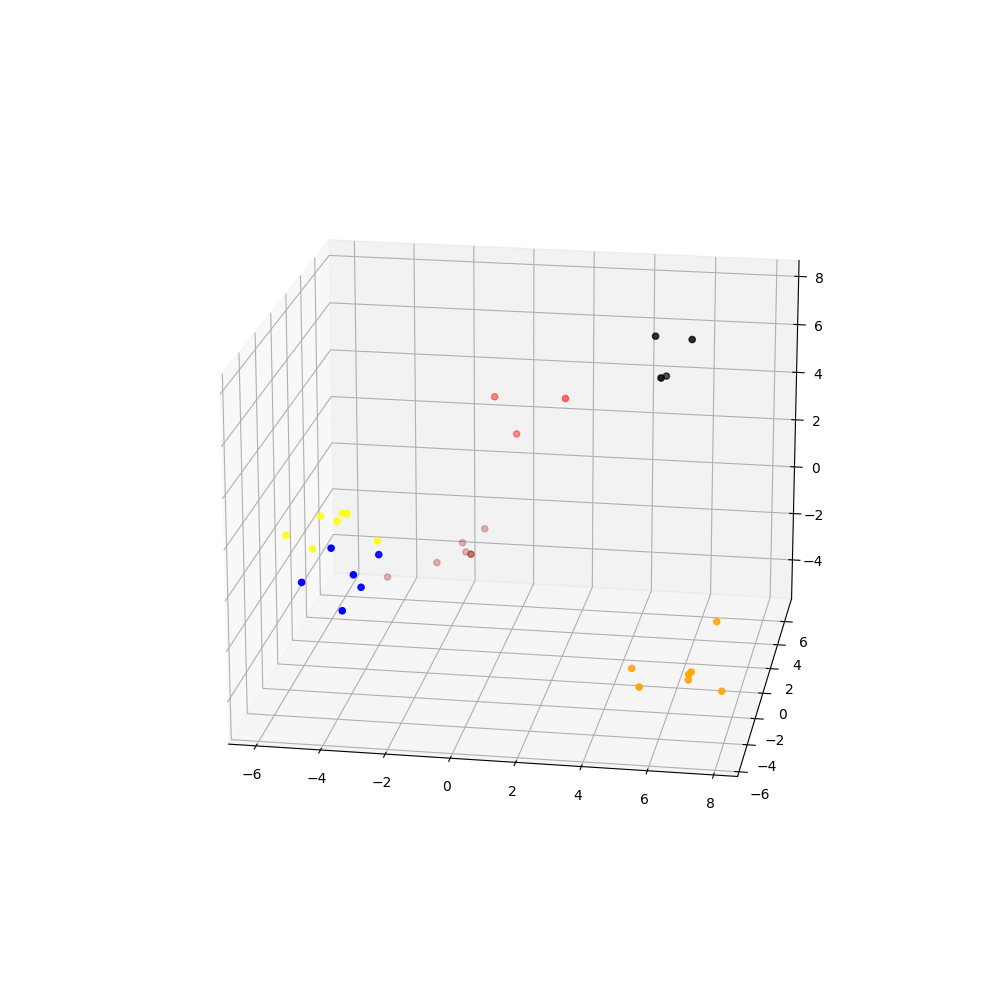

In [110]:
%matplotlib notebook
pca = PCA(n_components=3)
features_3d_1 = pca.fit_transform(features_1)

c={"Philip_Fernandez":"red", "Sok_Hui":"yellow", "Eng_Kwok ":"blue", "Tse_Koon":"orange", "piyush":"brown", "schooling":"black"}
colors = [c[person] for person in labels_1]


fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(features_3d_1[:,0], features_3d_1[:,1], features_3d_1[:,2], c=colors)

In [128]:
def extract_anchor_images_embeddings(embedding_model, detection_model,root_dir:str="test_images"):
    """
    Generates all the anchor embeddings from the root folder
    """
    category_image_filepaths = load_category_image_filepaths(root_dir)
    labels = []
    anchor_embeddings = []

    for category, image_filepaths in category_image_filepaths.items():
        print(f"Category: {category}")
        for image_filepath in image_filepaths:
            print(f"Image :{image_filepath}")
            
            img = cv2.imread(image_filepath)
            _, embeddings = get_faces_embeddings(img, embedding_model, detection_model)
            
            if len(embeddings) > 1:
                print("Skipping as more than 1 face found in image")
                continue
            if len(embeddings) == 0:
                print("Skipping as no faces found in image")
                continue
            
            labels.append(category)
            anchor_embeddings.append(embeddings[0])
            
    return labels, np.array(anchor_embeddings)

In [129]:
reference_labels, reference_embeddings = extract_anchor_images_embeddings(embedding_model, detection_model)

Category: Philip_Fernandez
Image :test_images/Philip_Fernandez/Philip_Fernandez_1.jpeg
1/1 [==============================] - 0s 43ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_2.jpeg
1/1 [==============================] - 0s 36ms/step
Image :test_images/Philip_Fernandez/Philip_Fernandez_3.jpeg
1/1 [==============================] - 0s 50ms/step
Category: Sok_Hui
Image :test_images/Sok_Hui/Sok_Hui_7.jpeg
1/1 [==============================] - 0s 40ms/step
Image :test_images/Sok_Hui/Sok_Hui_1.jpeg
1/1 [==============================] - 0s 42ms/step
Image :test_images/Sok_Hui/Sok_Hui_6.jpeg
1/1 [==============================] - 0s 39ms/step
Image :test_images/Sok_Hui/Sok_Hui_3.jpeg
1/1 [==============================] - 0s 39ms/step
Image :test_images/Sok_Hui/Sok_Hui_5.jpeg
1/1 [==============================] - 0s 41ms/step
Image :test_images/Sok_Hui/Sok_Hui_2.jpeg
1/1 [==============================] - 0s 35ms/step
Image :test_images/Sok_Hui/Sok_Hui_4.jpeg
1/1 [========

In [131]:
reference_embeddings.shape

(33, 128)

In [143]:
## reading videodetector_backend
def annotate_video(video_fp:str, 
                   reference_embeddings, 
                   reference_labels:list, 
                   detection_model,
                   embedding_model,
                   output_video_fp:str)->None:
    """
    Takes in an video filepath
    For each video frame, extracts all the faces in the frame a compare with reference embeddings
    Draw BBOX and labels on the video frame and append to video recorder
    Save the video to output path
    """
    
    cap = cv2.VideoCapture(video_fp)
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    
    
    out = cv2.VideoWriter(output_video_fp, cv2.VideoWriter_fourcc(*'mp4v'), 15, (frame_width,frame_height))
    
    try:
        while True:
            ret, frame = cap.read()

            if ret == True:
                coords, embeddings = get_faces_embeddings(frame, embedding_model, detection_model)
                
                if len(embeddings)>0:
                    cos_sims = cosine_similarity(embeddings,reference_embeddings)

                    preds = np.argmax(cos_sims, axis=1)
                    # draw rectangle and predictions
                    for index, (coord, pred) in enumerate(zip(coords, preds)):      
                        frame = cv2.rectangle(frame, coord[:2], coord[2:] , color=(255, 0, 0), thickness=2)
                        print(f"cos_sims {cos_sims[index][pred]}")
                        
                        text = "UNKNOWN"
                        if cos_sims[index][pred] > 0.4:
                            text = reference_labels[pred]
                            
                        cv2.putText(frame, text, 
                                    coord[:2], cv2.FONT_HERSHEY_SIMPLEX, 0.7, 
                                    (255, 0, 0), 2,cv2.LINE_AA)


                # display frame
                cv2.imshow("frame", frame)
        
                #save frame
                out.write(frame)

                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            else:
                break
    except Exception as e:
        print(e)
    finally:
        cap.release()
        out.release()
        cv2.destroyAllWindows()

    
    

In [144]:
test_video_filepath = "test_videos/test_video.mp4"
test_video_output_filepath = "test_videos/output_test_video.mp4"
annotate_video(test_video_filepath, features, labels, detection_model, embedding_model, test_video_output_filepath)

1/1 [==============================] - 0s 35ms/step
cos_sims 0.5671178379083814
1/1 [==============================] - 0s 46ms/step
cos_sims 0.562220240855595
1/1 [==============================] - 0s 36ms/step
cos_sims 0.5761713788018047
cos_sims 0.36820541914515614
1/1 [==============================] - 0s 40ms/step
cos_sims 0.33518889780660255
cos_sims 0.6654783809755196
1/1 [==============================] - 0s 39ms/step
cos_sims 0.3688453638297701
cos_sims 0.6757661429690642
1/1 [==============================] - 0s 34ms/step
cos_sims 0.3003711304508003
cos_sims 0.4984830126351219
1/1 [==============================] - 0s 39ms/step
cos_sims 0.2887475953414526
cos_sims 0.720802290499234
1/1 [==============================] - 0s 37ms/step
cos_sims 0.30178587451155825
cos_sims 0.6000466237661386
1/1 [==============================] - 0s 40ms/step
cos_sims 0.39114291665650214
cos_sims 0.5787731438453049
1/1 [==============================] - 0s 36ms/step
cos_sims 0.480212520114491
cos

1/1 [==============================] - 0s 40ms/step
cos_sims 0.7173901962625777
cos_sims 0.46579038037741977
1/1 [==============================] - 0s 30ms/step
cos_sims 0.695199684485183
cos_sims 0.5101899109040998
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7003149862237019
cos_sims 0.5797703008875967
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6898289275979403
cos_sims 0.6748245890468123
1/1 [==============================] - 0s 34ms/step
cos_sims 0.6975101681722926
cos_sims 0.5725958794764422
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7009371539939008
cos_sims 0.5976381076353433
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6809997082280869
cos_sims 0.5542660445536266
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7032273806095283
cos_sims 0.5358448963971512
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7121419608050493
cos_sims 0.6270798975315209
1/1 [=======================

1/1 [==============================] - 0s 40ms/step
cos_sims 0.6485885017653047
cos_sims 0.6808162069230265
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6521552859963473
cos_sims 0.6318303077840847
1/1 [==============================] - 0s 37ms/step
cos_sims 0.5997470384934284
cos_sims 0.6477933131706233
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6086956079785995
cos_sims 0.6592861477829146
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6242018456914664
cos_sims 0.6867244127293516
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6107533085425257
cos_sims 0.709205871379845
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6571765269839649
cos_sims 0.6595022646496244
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6522226286648823
cos_sims 0.7003167997237805
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6353552330766933
cos_sims 0.7203864656551605
1/1 [========================

1/1 [==============================] - 0s 33ms/step
cos_sims 0.6513234888019868
cos_sims 0.6639008867405628
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7225855243237844
cos_sims 0.661835127330531
1/1 [==============================] - 0s 37ms/step
cos_sims 0.688541844534018
cos_sims 0.6114926093318839
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6787646190388377
cos_sims 0.625243632207795
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6690257787455501
cos_sims 0.6662554404298707
1/1 [==============================] - 0s 33ms/step
cos_sims 0.6795045393543744
cos_sims 0.6895301244044048
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7339902680731997
cos_sims 0.6753010158833647
1/1 [==============================] - 0s 33ms/step
cos_sims 0.7201842543491002
cos_sims 0.6707370720153104
1/1 [==============================] - 0s 40ms/step
cos_sims 0.732868785337985
cos_sims 0.6754338035283642
1/1 [===========================

1/1 [==============================] - 0s 37ms/step
cos_sims 0.7838276576790085
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7939374695804646
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7984704719904638
1/1 [==============================] - 0s 46ms/step
cos_sims 0.7986131287816141
1/1 [==============================] - 0s 48ms/step
cos_sims 0.7688636670598259
1/1 [==============================] - 0s 45ms/step
cos_sims 0.7680294517610784
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7769983518582306
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7820027605626267
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8298262738320159
1/1 [==============================] - 0s 47ms/step
cos_sims 0.8033259997307506
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8228205717385402
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8300113125790557
1/1 [==============================] - 0

1/1 [==============================] - 0s 34ms/step
cos_sims 0.8479251048186088
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8547145409009593
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8659119528124493
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8553335827155165
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8639340616089046
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8622652304356468
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8557859074237293
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8527056250023654
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8460318670971894
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8570064385540035
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8558634107819671
1/1 [==============================] - 0s 50ms/step
cos_sims 0.8558925086109946
1/1 [==============================] - 0

1/1 [==============================] - 0s 47ms/step
cos_sims 0.8236780072831248
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7826945006548288
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8131713752822782
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7784393688943507
1/1 [==============================] - 0s 48ms/step
cos_sims 0.7828039301200442
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7757390623304765
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8348251552196257
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8001851276010903
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8103327210428428
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8053587655612688
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7967790610945358
1/1 [==============================] - 0s 45ms/step
cos_sims 0.7977083736530338
1/1 [==============================] - 0

1/1 [==============================] - 0s 40ms/step
cos_sims 0.8255197871825646
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8249001987938331
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8460586048921406
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8417406764262353
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8470645396625646
1/1 [==============================] - 0s 38ms/step
cos_sims 0.842828076060524
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8455720548310732
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8403620001475129
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8365884885280361
1/1 [==============================] - 0s 37ms/step
cos_sims 0.836481038925823
1/1 [==============================] - 0s 42ms/step
cos_sims 0.8384702284591659
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8319886003186436
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 38ms/step
cos_sims 0.7292959597256569
cos_sims 0.6790548494329816
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7129143824739974
cos_sims 0.7052178719694137
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7098725691536315
cos_sims 0.6985823843913832
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7497378708867167
cos_sims 0.6889784963833118
1/1 [==============================] - 0s 37ms/step
cos_sims 0.6893232038392454
cos_sims 0.675923190133749
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7468569097688637
cos_sims 0.6672512383595696
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7085584304567901
cos_sims 0.6725705254515006
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7618050447400081
cos_sims 0.6459766277954003
1/1 [==============================] - 0s 38ms/step
cos_sims 0.690802404461426
cos_sims 0.656278134851892
1/1 [==========================

cos_sims 0.8141514105237064
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8234360573207292
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8130322306634307
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8219498841952412
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8195689681375569
1/1 [==============================] - 0s 50ms/step
cos_sims 0.8118560649316908
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7891328302489815
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7758786055035853
1/1 [==============================] - 0s 54ms/step
cos_sims 0.7784022105448413
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7990499076261272
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8056579225852868
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8160606238324037
1/1 [==============================] - 0s 42ms/step
cos_sims 0.835907519436019
1/1 [========

1/1 [==============================] - 0s 35ms/step
cos_sims 0.7727417437204249
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7408818512635099
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7605023151363521
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7485990739640304
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7348563674577013
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7060012670809259
1/1 [==============================] - 0s 39ms/step
cos_sims 0.708791741126596
1/1 [==============================] - 0s 36ms/step
cos_sims 0.694176916561867
1/1 [==============================] - 0s 37ms/step
cos_sims 0.6577843684577371
1/1 [==============================] - 0s 41ms/step
cos_sims 0.6529367330902791
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8007778885001039
1/1 [==============================] - 0s 37ms/step
cos_sims 0.792227867904755
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 38ms/step
cos_sims 0.8220179834157113
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8338543586702993
1/1 [==============================] - 0s 35ms/step
cos_sims 0.823933455000111
1/1 [==============================] - 0s 36ms/step
cos_sims 0.804423792872384
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7662416141357258
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7730713938064663
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7327940082787252
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7004085983515533
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6914234584415806
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7316396868479773
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7665923429718214
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7742501982692105
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 35ms/step
cos_sims 0.8329361844806993
1/1 [==============================] - 0s 35ms/step
cos_sims 0.831224924026644
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8512141745708595
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8434729337785707
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8208912541499264
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8163150533483853
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8095305609777009
1/1 [==============================] - 0s 41ms/step
cos_sims 0.827968143944224
1/1 [==============================] - 0s 52ms/step
cos_sims 0.8279670956797888
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8251459890681424
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7974914162145503
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8105963549465783
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 35ms/step
cos_sims 0.8019822462965194
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8045339239439815
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7678260331501372
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7874124397282418
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7990797914276596
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8020149677679476
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8049040452874805
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8276185451456477
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8332988811026343
1/1 [==============================] - 0s 42ms/step
cos_sims 0.834358216961569
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8208814336575676
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8117425103381539
1/1 [==============================] - 0s

1/1 [==============================] - 0s 57ms/step
cos_sims 0.8512373685147707
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8542933691783026
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8312451737285068
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8382035850904876
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8327201416332379
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8698707640243089
1/1 [==============================] - 0s 32ms/step
cos_sims 0.8718565098704909
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8591584681952957
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8183749404544368
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8574066018202848
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8401324457454991
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8569816534443118
1/1 [==============================] - 0

1/1 [==============================] - 0s 41ms/step
cos_sims 0.7799237301820251
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7764433262701563
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7979708077834637
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8042889493677048
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7930501721965894
1/1 [==============================] - 0s 38ms/step
cos_sims 0.780260727108812
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8066394657410334
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8036168337225942
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7694587742530578
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7518505458275113
1/1 [==============================] - 0s 51ms/step
cos_sims 0.7775776806711279
1/1 [==============================] - 0s 43ms/step
cos_sims 0.7667840228117289
1/1 [==============================] - 0s

cos_sims 0.7525521144625797
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7395767327744744
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7226119604452054
1/1 [==============================] - 0s 46ms/step
cos_sims 0.7198111189240135
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7567481200795897
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7754063325169568
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7627212203068364
1/1 [==============================] - 0s 33ms/step
cos_sims 0.7629116861205232
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7554430569838289
1/1 [==============================] - 0s 39ms/step
cos_sims 0.771368628139619
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7400168559235987
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7588533817776951
1/1 [==============================] - 0s 36ms/step
cos_sims 0.747082753827085
1/1 [=========

1/1 [==============================] - 0s 41ms/step
cos_sims 0.7954776686206906
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8119487268710106
1/1 [==============================] - 0s 51ms/step
cos_sims 0.8155998450653497
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8051316976159292
1/1 [==============================] - 0s 46ms/step
cos_sims 0.7882794035220217
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7979596238630172
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8063910186050509
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8107378657058258
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7979203289176683
1/1 [==============================] - 0s 52ms/step
cos_sims 0.8098186444257476
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7908267452621514
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7995001001874349
1/1 [==============================] - 0

1/1 [==============================] - 0s 37ms/step
cos_sims 0.7216526470211968
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7560513804834624
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7581094124984593
1/1 [==============================] - 0s 37ms/step
cos_sims 0.775877440303986
1/1 [==============================] - 0s 48ms/step
cos_sims 0.7802853879080943
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7643579208952823
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7726332679111869
1/1 [==============================] - 0s 47ms/step
cos_sims 0.7614492407999498
1/1 [==============================] - 0s 43ms/step
cos_sims 0.7322622196719847
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7434035690158292
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7895508709864145
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7810088803380846
1/1 [==============================] - 0s

1/1 [==============================] - 0s 40ms/step
cos_sims 0.7504884168558116
cos_sims 0.5907815890571404
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7401456143635261
cos_sims 0.6067707522496092
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8042803994643457
cos_sims 0.5810426746031186
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7937493495762533
cos_sims 0.5924628710687398
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7530758483525855
cos_sims 0.6482040650060819
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7470531902454437
cos_sims 0.6286631453479438
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7415422420080204
cos_sims 0.6304634752801581
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6333794649830533
cos_sims 0.6607612384950903
1/1 [==============================] - 0s 42ms/step
cos_sims 0.6431589756968931
cos_sims 0.6868045094564793
1/1 [=======================

1/1 [==============================] - 0s 38ms/step
cos_sims 0.6667290561230921
cos_sims 0.6559297369354602
1/1 [==============================] - 0s 37ms/step
cos_sims 0.6467755895782923
cos_sims 0.6565597595654199
1/1 [==============================] - 0s 41ms/step
cos_sims 0.6117921692797031
cos_sims 0.630698319667696
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6656849000040365
cos_sims 0.6299785348315841
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7082763855946099
cos_sims 0.6584927707303784
1/1 [==============================] - 0s 37ms/step
cos_sims 0.6735169626473019
cos_sims 0.6291726600135004
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7031297565662996
cos_sims 0.6417794062947729
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7098974510960644
cos_sims 0.6173929748937358
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7018109384454478
cos_sims 0.6356848992553671
1/1 [========================

cos_sims 0.7477228319188549
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7572170956251005
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7545173998327931
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7686007125155827
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7447787894915526
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7659357925770296
1/1 [==============================] - 0s 51ms/step
cos_sims 0.761353988916328
1/1 [==============================] - 0s 54ms/step
cos_sims 0.7616712597138032
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7361821391499899
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7674304021876666
1/1 [==============================] - 0s 37ms/step
cos_sims 0.755810685957941
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7381578308742089
1/1 [==============================] - 0s 43ms/step
cos_sims 0.7498950192337889
1/1 [=========

1/1 [==============================] - 0s 37ms/step
cos_sims 0.8208664459114582
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8367626545484483
1/1 [==============================] - 0s 42ms/step
cos_sims 0.8249512494979159
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8025947210504469
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7950216025369296
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8208199330793249
1/1 [==============================] - 0s 42ms/step
cos_sims 0.769148222668264
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7633650367017599
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7493538380120643
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7430723968716535
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7646107934541986
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7847512967184573
1/1 [==============================] - 0s

1/1 [==============================] - 0s 39ms/step
cos_sims 0.6885888368682488
cos_sims 0.623749252360383
1/1 [==============================] - 0s 37ms/step
cos_sims 0.6757650844655744
cos_sims 0.649948198117961
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6845679783604605
cos_sims 0.6326300354561823
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7093278775873308
cos_sims 0.631719716224952
1/1 [==============================] - 0s 40ms/step
cos_sims 0.738192905298024
cos_sims 0.6288827204030122
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6313587766551918
cos_sims 0.6249046837597066
1/1 [==============================] - 0s 43ms/step
cos_sims 0.6405902314490881
cos_sims 0.6395850414811333
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6204884249323583
cos_sims 0.6394247956704475
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7750516961671783
cos_sims 0.6243996203895475
1/1 [===========================

cos_sims 0.8303267758077328
1/1 [==============================] - 0s 32ms/step
cos_sims 0.8368635707423087
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8246068781761134
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8281996107399568
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8207749621899161
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8283841400746016
1/1 [==============================] - 0s 35ms/step
cos_sims 0.828812679594645
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8445445664761075
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8310614265994376
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8489808653814737
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8379623305994828
1/1 [==============================] - 0s 40ms/step
cos_sims 0.837668113100068
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8371960755458188
1/1 [=========

1/1 [==============================] - 0s 35ms/step
cos_sims 0.7884565461680142
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7775775895366877
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7976263125403892
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7773192537185623
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7901411017231279
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7861007849053032
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7847114641314924
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8015437688090281
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7953055107460917
1/1 [==============================] - 0s 49ms/step
cos_sims 0.8048773657668236
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8032853554828759
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8037431234255573
1/1 [==============================] - 0

1/1 [==============================] - 0s 34ms/step
cos_sims 0.7972144650110019
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7782708452464646
1/1 [==============================] - 0s 50ms/step
cos_sims 0.7786504225681052
1/1 [==============================] - 0s 48ms/step
cos_sims 0.7885346500785351
1/1 [==============================] - 0s 40ms/step
cos_sims 0.779827748598558
1/1 [==============================] - 0s 42ms/step
cos_sims 0.781384063794786
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7714625041588331
1/1 [==============================] - 0s 49ms/step
cos_sims 0.7629322712213549
1/1 [==============================] - 0s 51ms/step
cos_sims 0.758798471725487
1/1 [==============================] - 0s 39ms/step
cos_sims 0.766391292052882
1/1 [==============================] - 0s 44ms/step
cos_sims 0.7823827333993261
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7658098626007169
1/1 [==============================] - 0s 53

1/1 [==============================] - 0s 36ms/step
cos_sims 0.6801941614213983
cos_sims 0.768797918224906
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7161257855048936
cos_sims 0.734089292838369
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7863082249620141
cos_sims 0.6846718324899427
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7622802808199393
cos_sims 0.687653153946632
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7222325840138291
cos_sims 0.7149245446030393
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6987447628322268
cos_sims 0.734727540308181
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7329680618407872
cos_sims 0.750225773969211
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7110280322968151
cos_sims 0.7302190693779786
1/1 [==============================] - 0s 37ms/step
cos_sims 0.661341223412009
cos_sims 0.699531115842395
1/1 [==============================

1/1 [==============================] - 0s 37ms/step
cos_sims 0.6925212056091659
cos_sims 0.7090763402681011
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6690903560148013
cos_sims 0.6940181103334017
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7100969276800918
cos_sims 0.6972646336293001
1/1 [==============================] - 0s 37ms/step
cos_sims 0.712023416878116
cos_sims 0.7135955422362122
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6744350767338789
cos_sims 0.7208273299320694
1/1 [==============================] - 0s 43ms/step
cos_sims 0.7222893132750319
cos_sims 0.7191217032112532
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7007742860832294
cos_sims 0.6793940012034906
1/1 [==============================] - 0s 37ms/step
cos_sims 0.73726009956437
cos_sims 0.6866933552382798
1/1 [==============================] - 0s 39ms/step
cos_sims 0.6984051489249882
cos_sims 0.672620127280414
1/1 [===========================

1/1 [==============================] - 0s 36ms/step
cos_sims 0.7542291905266844
cos_sims 0.6709309913486092
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7343992743740807
cos_sims 0.6942512985231697
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7810359423441288
cos_sims 0.6726742652251279
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7557775327367248
cos_sims 0.6347879290579922
1/1 [==============================] - 0s 43ms/step
cos_sims 0.7105261892014405
cos_sims 0.6601043756572229
1/1 [==============================] - 0s 34ms/step
cos_sims 0.6156876359090153
cos_sims 0.6702156605121962
1/1 [==============================] - 0s 34ms/step
cos_sims 0.49694193387793295
cos_sims 0.6768189535912428
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6349468197381839
cos_sims 0.7207656279854894
1/1 [==============================] - 0s 39ms/step
cos_sims 0.6417129744808641
cos_sims 0.7028010331222208
1/1 [======================

1/1 [==============================] - 0s 37ms/step
cos_sims 0.8106334800902308
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8267567011009427
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8207982646261139
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7975657539405346
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8139078275861261
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8024017137479384
1/1 [==============================] - 0s 50ms/step
cos_sims 0.8433935351424395
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8267124989855774
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8295736486372957
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8481387498811778
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8183053241557878
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7707582141040484
1/1 [==============================] - 0

1/1 [==============================] - 0s 34ms/step
cos_sims 0.7930307238880805
1/1 [==============================] - 0s 47ms/step
cos_sims 0.8373752689837585
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7967012046014859
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8050632083038216
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8021772930752267
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8054821294962826
1/1 [==============================] - 0s 51ms/step
cos_sims 0.8084740202063877
1/1 [==============================] - 0s 57ms/step
cos_sims 0.8123260186754835
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8175131439711779
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8279246812244565
1/1 [==============================] - 0s 47ms/step
cos_sims 0.8184933312031877
1/1 [==============================] - 0s 46ms/step
cos_sims 0.822209327540133
1/1 [==============================] - 0s

cos_sims 0.8594630561399424
1/1 [==============================] - 0s 42ms/step
cos_sims 0.8282349865436932
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8526790107463645
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8794337166302693
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8644501766303259
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8633911893978533
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8669337080489478
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8526220863670497
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8598518619448337
1/1 [==============================] - 0s 32ms/step
cos_sims 0.8683750281527056
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8770218960721305
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8558728748291502
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8415648514368116
1/1 [=======

1/1 [==============================] - 0s 40ms/step
cos_sims 0.751589858908742
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7512712395597783
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7517293665058022
1/1 [==============================] - 0s 41ms/step
cos_sims 0.779721192222365
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8272026896337767
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8194929815423735
1/1 [==============================] - 0s 49ms/step
cos_sims 0.8054544303526325
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8201801071826016
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8322062553041518
1/1 [==============================] - 0s 50ms/step
cos_sims 0.8133375070091567
1/1 [==============================] - 0s 46ms/step
cos_sims 0.8223558736359169
1/1 [==============================] - 0s 45ms/step
cos_sims 0.8241663657617666
1/1 [==============================] - 0s 

cos_sims 0.7936103686657898
1/1 [==============================] - 0s 35ms/step
cos_sims 0.784133631584622
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8116164995803115
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7897554733276007
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8023720350314354
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8067320433029089
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8010259923160339
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7594429901757209
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7849562921193017
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8006215922725257
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7882305372610492
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7919919457448183
1/1 [==============================] - 0s 37ms/step
cos_sims 0.814339798936608
1/1 [=========

1/1 [==============================] - 0s 37ms/step
cos_sims 0.7469901841809888
cos_sims 0.6248952241244625
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7748247669956653
cos_sims 0.6888545646365809
1/1 [==============================] - 0s 39ms/step
cos_sims 0.7512492466361627
cos_sims 0.6801937086679616
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7519230785670568
cos_sims 0.6641285011049118
1/1 [==============================] - 0s 36ms/step
cos_sims 0.6722275107359386
cos_sims 0.7215158616273137
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7203831881621315
cos_sims 0.6967961617168861
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7674770742293324
cos_sims 0.6823391040695322
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7495735983075839
cos_sims 0.6871587564640764
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6914893153204411
cos_sims 0.6208073332773476
1/1 [=======================

1/1 [==============================] - 0s 34ms/step
cos_sims 0.7105136943310318
cos_sims 0.6895219147172819
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7379384067026452
cos_sims 0.6988590413869242
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7347498128400194
cos_sims 0.7169262575678202
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7285748658927813
cos_sims 0.7226277112138685
1/1 [==============================] - 0s 31ms/step
cos_sims 0.6974833330357384
cos_sims 0.7029896553924013
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7015915990312067
cos_sims 0.6931805474424894
1/1 [==============================] - 0s 30ms/step
cos_sims 0.6974227504528361
cos_sims 0.6708258113247988
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7127786518247659
cos_sims 0.6702591956501794
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6436121768581428
cos_sims 0.6835286443976419
1/1 [=======================

1/1 [==============================] - 0s 38ms/step
cos_sims 0.7797681739207668
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8108649145299611
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8324426062030188
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8162423154265948
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8170327533648155
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7774370850189537
1/1 [==============================] - 0s 35ms/step
cos_sims 0.77026737072403
1/1 [==============================] - 0s 33ms/step
cos_sims 0.7691064355601485
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7520025852124674
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7629285848904074
1/1 [==============================] - 0s 37ms/step
cos_sims 0.749630488217659
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7558072505044424
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 42ms/step
cos_sims 0.8753642362767464
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8707157400487894
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8735806717346042
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8876255593029942
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8798717811160803
1/1 [==============================] - 0s 42ms/step
cos_sims 0.8728756999515347
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8842941637680297
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8806417294621451
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8689287864929642
1/1 [==============================] - 0s 42ms/step
cos_sims 0.8619992265329903
1/1 [==============================] - 0s 47ms/step
cos_sims 0.8676036556022602
1/1 [==============================] - 0s 38ms/step
cos_sims 0.867651086018427
1/1 [==============================] - 0s

cos_sims 0.7727681454032909
1/1 [==============================] - 0s 47ms/step
cos_sims 0.7782724571935677
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7877117716996481
1/1 [==============================] - 0s 35ms/step
cos_sims 0.763797067029576
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7887693556075661
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7872764029388074
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7886194939205113
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7792882818745368
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7776768960198247
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8013466030086477
1/1 [==============================] - 0s 40ms/step
cos_sims 0.7991846044792972
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7893757076731698
1/1 [==============================] - 0s 47ms/step
cos_sims 0.7944601276331202
1/1 [========

1/1 [==============================] - 0s 38ms/step
cos_sims 0.8013153268756248
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8011227172744895
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8203338146768404
1/1 [==============================] - 0s 31ms/step
cos_sims 0.8240442471065054
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8170024311925934
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8421524122096652
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8342221793217195
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8380041995706906
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8280048560624227
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8294168272920701
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8352587534526916
1/1 [==============================] - 0s 44ms/step
cos_sims 0.8164529393954896
1/1 [==============================] - 0

1/1 [==============================] - 0s 34ms/step
cos_sims 0.8257786909867189
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8186232664634613
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8228667748664172
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8324213105985465
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8152841942581978
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8431076726514524
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8365563723719849
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8389742586123449
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8432915351758065
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8447789240135614
1/1 [==============================] - 0s 40ms/step
cos_sims 0.849396984707866
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8289280750217891
1/1 [==============================] - 0s

1/1 [==============================] - 0s 35ms/step
cos_sims 0.7649267563986748
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7993491492141289
1/1 [==============================] - 0s 37ms/step
cos_sims 0.778732293361246
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7789405126637297
1/1 [==============================] - 0s 34ms/step
cos_sims 0.790381552016599
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8117857044397707
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7876952279646998
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7823872867555116
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7893777503882573
1/1 [==============================] - 0s 40ms/step
cos_sims 0.766592492783494
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7880391939873537
1/1 [==============================] - 0s 37ms/step
cos_sims 0.7976638758361911
1/1 [==============================] - 0s 3

cos_sims 0.7880364419051696
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7630290972240461
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7679770471284233
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7670782492645439
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8212571791802059
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8389909816094575
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8179355464239184
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8078345057057654
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7810556138124574
1/1 [==============================] - 0s 42ms/step
cos_sims 0.7976081967286396
1/1 [==============================] - 0s 40ms/step
cos_sims 0.8198110174749205
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8163764099099504
1/1 [==============================] - 0s 34ms/step
cos_sims 0.8103211946410475
1/1 [=======

1/1 [==============================] - 0s 37ms/step
cos_sims 0.865266470171274
1/1 [==============================] - 0s 43ms/step
cos_sims 0.8710481254939391
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8632503845010082
1/1 [==============================] - 0s 41ms/step
cos_sims 0.8657645288106424
1/1 [==============================] - 0s 37ms/step
cos_sims 0.857945676457907
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8732549598367101
1/1 [==============================] - 0s 38ms/step
cos_sims 0.8503244114675229
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8566545708691595
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8684354599234598
1/1 [==============================] - 0s 38ms/step
cos_sims 0.857570797317392
1/1 [==============================] - 0s 51ms/step
cos_sims 0.8620940404337377
1/1 [==============================] - 0s 35ms/step
cos_sims 0.8644240735258875
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 35ms/step
cos_sims 0.5679828760200396
cos_sims 0.6875388428501515
1/1 [==============================] - 0s 40ms/step
cos_sims 0.6020058119713066
cos_sims 0.686067963248371
1/1 [==============================] - 0s 37ms/step
cos_sims 0.5555933948967962
cos_sims 0.666672217212947
1/1 [==============================] - 0s 39ms/step
cos_sims 0.6544008153668903
cos_sims 0.6735332660803911
1/1 [==============================] - 0s 36ms/step
cos_sims 0.5775294840531369
cos_sims 0.6940127699103108
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6514405322685812
cos_sims 0.7119196246439795
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6236088041790024
cos_sims 0.6832481193563483
1/1 [==============================] - 0s 40ms/step
cos_sims 0.5975866472762744
cos_sims 0.7026388640551818
1/1 [==============================] - 0s 36ms/step
cos_sims 0.5762846677005613
cos_sims 0.7255153730502938
1/1 [=========================

1/1 [==============================] - 0s 37ms/step
cos_sims 0.8298245850463967
1/1 [==============================] - 0s 33ms/step
cos_sims 0.8271042313472815
1/1 [==============================] - 0s 39ms/step
cos_sims 0.8260796604312219
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7063011040487157
cos_sims 0.6884130755499892
1/1 [==============================] - 0s 41ms/step
cos_sims 0.7011834979083791
cos_sims 0.703123896227904
1/1 [==============================] - 0s 35ms/step
cos_sims 0.6530734566208243
cos_sims 0.6742340831771119
1/1 [==============================] - 0s 38ms/step
cos_sims 0.665553637503383
cos_sims 0.8248029728483902
1/1 [==============================] - 0s 34ms/step
cos_sims 0.6860942938553126
cos_sims 0.8069093832974201
1/1 [==============================] - 0s 41ms/step
cos_sims 0.6430567682162869
cos_sims 0.7270748750141828
1/1 [==============================] - 0s 38ms/step
cos_sims 0.6758532361931142
cos_sims 0.7889077965903715
1/1 [=

1/1 [==============================] - 0s 39ms/step
cos_sims 0.8024321549930625
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7980667660862156
1/1 [==============================] - 0s 35ms/step
cos_sims 0.771193163872314
1/1 [==============================] - 0s 34ms/step
cos_sims 0.7823210994837272
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7923284439857929
1/1 [==============================] - 0s 37ms/step
cos_sims 0.8080905219135448
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7932635552967651
1/1 [==============================] - 0s 35ms/step
cos_sims 0.7856187277104425
1/1 [==============================] - 0s 36ms/step
cos_sims 0.7613661498484071
1/1 [==============================] - 0s 38ms/step
cos_sims 0.7901623839022349
1/1 [==============================] - 0s 36ms/step
cos_sims 0.8085562085346618


In [156]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, ZeroPadding2D, Conv2D, ReLU, MaxPool2D, Add, UpSampling2D, concatenate, Softmax
import tensorflow as tf
from pathlib import Path
import os

from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import add
from tensorflow.keras import backend as K

from deepface.basemodels.Facenet import InceptionResNetV2


def load_retinaface(weights_fp:str):
    """Creates the model and loads the weights"""
    data = Input(dtype=tf.float32, shape=(None, None, 3), name='data')

    bn_data = BatchNormalization(epsilon=1.9999999494757503e-05, name='bn_data', trainable=False)(data)

    conv0_pad = ZeroPadding2D(padding=tuple([3, 3]))(bn_data)

    conv0 = Conv2D(filters = 64, kernel_size = (7, 7), name = 'conv0', strides = [2, 2], padding = 'VALID', use_bias = False)(conv0_pad)

    bn0 = BatchNormalization(epsilon=1.9999999494757503e-05, name='bn0', trainable=False)(conv0)

    relu0 = ReLU(name='relu0')(bn0)

    pooling0_pad = ZeroPadding2D(padding=tuple([1, 1]))(relu0)

    pooling0 = MaxPool2D((3, 3), (2, 2), padding='VALID', name='pooling0')(pooling0_pad)

    stage1_unit1_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit1_bn1', trainable=False)(pooling0)

    stage1_unit1_relu1 = ReLU(name='stage1_unit1_relu1')(stage1_unit1_bn1)

    stage1_unit1_conv1 = Conv2D(filters = 64, kernel_size = (1, 1), name = 'stage1_unit1_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit1_relu1)

    stage1_unit1_sc = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage1_unit1_sc', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit1_relu1)

    stage1_unit1_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit1_bn2', trainable=False)(stage1_unit1_conv1)

    stage1_unit1_relu2 = ReLU(name='stage1_unit1_relu2')(stage1_unit1_bn2)

    stage1_unit1_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage1_unit1_relu2)

    stage1_unit1_conv2 = Conv2D(filters = 64, kernel_size = (3, 3), name = 'stage1_unit1_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit1_conv2_pad)

    stage1_unit1_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit1_bn3', trainable=False)(stage1_unit1_conv2)

    stage1_unit1_relu3 = ReLU(name='stage1_unit1_relu3')(stage1_unit1_bn3)

    stage1_unit1_conv3 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage1_unit1_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit1_relu3)

    plus0_v1 = Add()([stage1_unit1_conv3 , stage1_unit1_sc])

    stage1_unit2_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit2_bn1', trainable=False)(plus0_v1)

    stage1_unit2_relu1 = ReLU(name='stage1_unit2_relu1')(stage1_unit2_bn1)

    stage1_unit2_conv1 = Conv2D(filters = 64, kernel_size = (1, 1), name = 'stage1_unit2_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit2_relu1)

    stage1_unit2_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit2_bn2', trainable=False)(stage1_unit2_conv1)

    stage1_unit2_relu2 = ReLU(name='stage1_uniretinaface_build_modelt2_relu2')(stage1_unit2_bn2)

    stage1_unit2_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage1_unit2_relu2)

    stage1_unit2_conv2 = Conv2D(filters = 64, kernel_size = (3, 3), name = 'stage1_unit2_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit2_conv2_pad)

    stage1_unit2_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit2_bn3', trainable=False)(stage1_unit2_conv2)

    stage1_unit2_relu3 = ReLU(name='stage1_unit2_relu3')(stage1_unit2_bn3)

    stage1_unit2_conv3 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage1_unit2_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit2_relu3)

    plus1_v2 = Add()([stage1_unit2_conv3 , plus0_v1])

    stage1_unit3_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit3_bn1', trainable=False)(plus1_v2)

    stage1_unit3_relu1 = ReLU(name='stage1_unit3_relu1')(stage1_unit3_bn1)

    stage1_unit3_conv1 = Conv2D(filters = 64, kernel_size = (1, 1), name = 'stage1_unit3_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit3_relu1)

    stage1_unit3_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit3_bn2', trainable=False)(stage1_unit3_conv1)

    stage1_unit3_relu2 = ReLU(name='stage1_unit3_relu2')(stage1_unit3_bn2)

    stage1_unit3_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage1_unit3_relu2)

    stage1_unit3_conv2 = Conv2D(filters = 64, kernel_size = (3, 3), name = 'stage1_unit3_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit3_conv2_pad)

    stage1_unit3_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage1_unit3_bn3', trainable=False)(stage1_unit3_conv2)

    stage1_unit3_relu3 = ReLU(name='stage1_unit3_relu3')(stage1_unit3_bn3)

    stage1_unit3_conv3 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage1_unit3_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage1_unit3_relu3)

    plus2 = Add()([stage1_unit3_conv3 , plus1_v2])

    stage2_unit1_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit1_bn1', trainable=False)(plus2)

    stage2_unit1_relu1 = ReLU(name='stage2_unit1_relu1')(stage2_unit1_bn1)

    stage2_unit1_conv1 = Conv2D(filters = 128, kernel_size = (1, 1), name = 'stage2_unit1_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit1_relu1)

    stage2_unit1_sc = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage2_unit1_sc', strides = [2, 2], padding = 'VALID', use_bias = False)(stage2_unit1_relu1)

    stage2_unit1_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit1_bn2', trainable=False)(stage2_unit1_conv1)

    stage2_unit1_relu2 = ReLU(name='stage2_unit1_relu2')(stage2_unit1_bn2)

    stage2_unit1_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage2_unit1_relu2)

    stage2_unit1_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'stage2_unit1_conv2', strides = [2, 2], padding = 'VALID', use_bias = False)(stage2_unit1_conv2_pad)

    stage2_unit1_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit1_bn3', trainable=False)(stage2_unit1_conv2)

    stage2_unit1_relu3 = ReLU(name='stage2_unit1_relu3')(stage2_unit1_bn3)

    stage2_unit1_conv3 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage2_unit1_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit1_relu3)

    plus3 = Add()([stage2_unit1_conv3 , stage2_unit1_sc])

    stage2_unit2_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit2_bn1', trainable=False)(plus3)

    stage2_unit2_relu1 = ReLU(name='stage2_unit2_relu1')(stage2_unit2_bn1)

    stage2_unit2_conv1 = Conv2D(filters = 128, kernel_size = (1, 1), name = 'stage2_unit2_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit2_relu1)

    stage2_unit2_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit2_bn2', trainable=False)(stage2_unit2_conv1)

    stage2_unit2_relu2 = ReLU(name='stage2_unit2_relu2')(stage2_unit2_bn2)

    stage2_unit2_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage2_unit2_relu2)

    stage2_unit2_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'stage2_unit2_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit2_conv2_pad)

    stage2_unit2_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit2_bn3', trainable=False)(stage2_unit2_conv2)

    stage2_unit2_relu3 = ReLU(name='stage2_unit2_relu3')(stage2_unit2_bn3)

    stage2_unit2_conv3 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage2_unit2_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit2_relu3)

    plus4 = Add()([stage2_unit2_conv3 , plus3])

    stage2_unit3_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit3_bn1', trainable=False)(plus4)

    stage2_unit3_relu1 = ReLU(name='stage2_unit3_relu1')(stage2_unit3_bn1)

    stage2_unit3_conv1 = Conv2D(filters = 128, kernel_size = (1, 1), name = 'stage2_unit3_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit3_relu1)

    stage2_unit3_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit3_bn2', trainable=False)(stage2_unit3_conv1)

    stage2_unit3_relu2 = ReLU(name='stage2_unit3_relu2')(stage2_unit3_bn2)

    stage2_unit3_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage2_unit3_relu2)

    stage2_unit3_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'stage2_unit3_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit3_conv2_pad)

    stage2_unit3_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit3_bn3', trainable=False)(stage2_unit3_conv2)

    stage2_unit3_relu3 = ReLU(name='stage2_unit3_relu3')(stage2_unit3_bn3)

    stage2_unit3_conv3 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage2_unit3_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit3_relu3)

    plus5 = Add()([stage2_unit3_conv3 , plus4])

    stage2_unit4_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit4_bn1', trainable=False)(plus5)

    stage2_unit4_relu1 = ReLU(name='stage2_unit4_relu1')(stage2_unit4_bn1)

    stage2_unit4_conv1 = Conv2D(filters = 128, kernel_size = (1, 1), name = 'stage2_unit4_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit4_relu1)

    stage2_unit4_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit4_bn2', trainable=False)(stage2_unit4_conv1)

    stage2_unit4_relu2 = ReLU(name='stage2_unit4_relu2')(stage2_unit4_bn2)

    stage2_unit4_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage2_unit4_relu2)

    stage2_unit4_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'stage2_unit4_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit4_conv2_pad)

    stage2_unit4_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage2_unit4_bn3', trainable=False)(stage2_unit4_conv2)

    stage2_unit4_relu3 = ReLU(name='stage2_unit4_relu3')(stage2_unit4_bn3)

    stage2_unit4_conv3 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage2_unit4_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage2_unit4_relu3)

    plus6 = Add()([stage2_unit4_conv3 , plus5])

    stage3_unit1_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit1_bn1', trainable=False)(plus6)

    stage3_unit1_relu1 = ReLU(name='stage3_unit1_relu1')(stage3_unit1_bn1)

    stage3_unit1_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit1_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit1_relu1)

    stage3_unit1_sc = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit1_sc', strides = [2, 2], padding = 'VALID', use_bias = False)(stage3_unit1_relu1)

    stage3_unit1_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit1_bn2', trainable=False)(stage3_unit1_conv1)

    stage3_unit1_relu2 = ReLU(name='stage3_unit1_relu2')(stage3_unit1_bn2)

    stage3_unit1_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit1_relu2)

    stage3_unit1_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit1_conv2', strides = [2, 2], padding = 'VALID', use_bias = False)(stage3_unit1_conv2_pad)

    ssh_m1_red_conv = Conv2D(filters = 256, kernel_size = (1, 1), name = 'ssh_m1_red_conv', strides = [1, 1], padding = 'VALID', use_bias = True)(stage3_unit1_relu2)

    stage3_unit1_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit1_bn3', trainable=False)(stage3_unit1_conv2)

    ssh_m1_red_conv_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_red_conv_bn', trainable=False)(ssh_m1_red_conv)

    stage3_unit1_relu3 = ReLU(name='stage3_unit1_relu3')(stage3_unit1_bn3)

    ssh_m1_red_conv_relu = ReLU(name='ssh_m1_red_conv_relu')(ssh_m1_red_conv_bn)

    stage3_unit1_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit1_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit1_relu3)

    plus7 = Add()([stage3_unit1_conv3 , stage3_unit1_sc])

    stage3_unit2_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit2_bn1', trainable=False)(plus7)

    stage3_unit2_relu1 = ReLU(name='stage3_unit2_relu1')(stage3_unit2_bn1)

    stage3_unit2_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit2_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit2_relu1)

    stage3_unit2_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit2_bn2', trainable=False)(stage3_unit2_conv1)

    stage3_unit2_relu2 = ReLU(name='stage3_unit2_relu2')(stage3_unit2_bn2)

    stage3_unit2_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit2_relu2)

    stage3_unit2_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit2_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit2_conv2_pad)

    stage3_unit2_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit2_bn3', trainable=False)(stage3_unit2_conv2)

    stage3_unit2_relu3 = ReLU(name='stage3_unit2_relu3')(stage3_unit2_bn3)

    stage3_unit2_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit2_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit2_relu3)

    plus8 = Add()([stage3_unit2_conv3 , plus7])

    stage3_unit3_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit3_bn1', trainable=False)(plus8)

    stage3_unit3_relu1 = ReLU(name='stage3_unit3_relu1')(stage3_unit3_bn1)

    stage3_unit3_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit3_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit3_relu1)

    stage3_unit3_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit3_bn2', trainable=False)(stage3_unit3_conv1)

    stage3_unit3_relu2 = ReLU(name='stage3_unit3_relu2')(stage3_unit3_bn2)

    stage3_unit3_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit3_relu2)

    stage3_unit3_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit3_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit3_conv2_pad)

    stage3_unit3_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit3_bn3', trainable=False)(stage3_unit3_conv2)

    stage3_unit3_relu3 = ReLU(name='stage3_unit3_relu3')(stage3_unit3_bn3)

    stage3_unit3_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit3_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit3_relu3)

    plus9 = Add()([stage3_unit3_conv3 , plus8])

    stage3_unit4_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit4_bn1', trainable=False)(plus9)

    stage3_unit4_relu1 = ReLU(name='stage3_unit4_relu1')(stage3_unit4_bn1)

    stage3_unit4_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit4_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit4_relu1)

    stage3_unit4_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit4_bn2', trainable=False)(stage3_unit4_conv1)

    stage3_unit4_relu2 = ReLU(name='stage3_unit4_relu2')(stage3_unit4_bn2)

    stage3_unit4_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit4_relu2)

    stage3_unit4_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit4_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit4_conv2_pad)

    stage3_unit4_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit4_bn3', trainable=False)(stage3_unit4_conv2)

    stage3_unit4_relu3 = ReLU(name='stage3_unit4_relu3')(stage3_unit4_bn3)

    stage3_unit4_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit4_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit4_relu3)

    plus10 = Add()([stage3_unit4_conv3 , plus9])

    stage3_unit5_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit5_bn1', trainable=False)(plus10)

    stage3_unit5_relu1 = ReLU(name='stage3_unit5_relu1')(stage3_unit5_bn1)

    stage3_unit5_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit5_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit5_relu1)

    stage3_unit5_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit5_bn2', trainable=False)(stage3_unit5_conv1)

    stage3_unit5_relu2 = ReLU(name='stage3_unit5_relu2')(stage3_unit5_bn2)

    stage3_unit5_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit5_relu2)

    stage3_unit5_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit5_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit5_conv2_pad)

    stage3_unit5_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit5_bn3', trainable=False)(stage3_unit5_conv2)

    stage3_unit5_relu3 = ReLU(name='stage3_unit5_relu3')(stage3_unit5_bn3)

    stage3_unit5_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit5_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit5_relu3)

    plus11 = Add()([stage3_unit5_conv3 , plus10])

    stage3_unit6_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit6_bn1', trainable=False)(plus11)

    stage3_unit6_relu1 = ReLU(name='stage3_unit6_relu1')(stage3_unit6_bn1)

    stage3_unit6_conv1 = Conv2D(filters = 256, kernel_size = (1, 1), name = 'stage3_unit6_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit6_relu1)

    stage3_unit6_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit6_bn2', trainable=False)(stage3_unit6_conv1)

    stage3_unit6_relu2 = ReLU(name='stage3_unit6_relu2')(stage3_unit6_bn2)

    stage3_unit6_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage3_unit6_relu2)

    stage3_unit6_conv2 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'stage3_unit6_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit6_conv2_pad)

    stage3_unit6_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage3_unit6_bn3', trainable=False)(stage3_unit6_conv2)

    stage3_unit6_relu3 = ReLU(name='stage3_unit6_relu3')(stage3_unit6_bn3)

    stage3_unit6_conv3 = Conv2D(filters = 1024, kernel_size = (1, 1), name = 'stage3_unit6_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage3_unit6_relu3)

    plus12 = Add()([stage3_unit6_conv3 , plus11])

    stage4_unit1_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit1_bn1', trainable=False)(plus12)

    stage4_unit1_relu1 = ReLU(name='stage4_unit1_relu1')(stage4_unit1_bn1)

    stage4_unit1_conv1 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage4_unit1_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit1_relu1)

    stage4_unit1_sc = Conv2D(filters = 2048, kernel_size = (1, 1), name = 'stage4_unit1_sc', strides = [2, 2], padding = 'VALID', use_bias = False)(stage4_unit1_relu1)

    stage4_unit1_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit1_bn2', trainable=False)(stage4_unit1_conv1)

    stage4_unit1_relu2 = ReLU(name='stage4_unit1_relu2')(stage4_unit1_bn2)

    stage4_unit1_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage4_unit1_relu2)

    stage4_unit1_conv2 = Conv2D(filters = 512, kernel_size = (3, 3), name = 'stage4_unit1_conv2', strides = [2, 2], padding = 'VALID', use_bias = False)(stage4_unit1_conv2_pad)

    ssh_c2_lateral = Conv2D(filters = 256, kernel_size = (1, 1), name = 'ssh_c2_lateral', strides = [1, 1], padding = 'VALID', use_bias = True)(stage4_unit1_relu2)

    stage4_unit1_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit1_bn3', trainable=False)(stage4_unit1_conv2)

    ssh_c2_lateral_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_c2_lateral_bn', trainable=False)(ssh_c2_lateral)

    stage4_unit1_relu3 = ReLU(name='stage4_unit1_relu3')(stage4_unit1_bn3)

    ssh_c2_lateral_relu = ReLU(name='ssh_c2_lateral_relu')(ssh_c2_lateral_bn)

    stage4_unit1_conv3 = Conv2D(filters = 2048, kernel_size = (1, 1), name = 'stage4_unit1_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit1_relu3)

    plus13 = Add()([stage4_unit1_conv3 , stage4_unit1_sc])

    stage4_unit2_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit2_bn1', trainable=False)(plus13)

    stage4_unit2_relu1 = ReLU(name='stage4_unit2_relu1')(stage4_unit2_bn1)

    stage4_unit2_conv1 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage4_unit2_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit2_relu1)

    stage4_unit2_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit2_bn2', trainable=False)(stage4_unit2_conv1)

    stage4_unit2_relu2 = ReLU(name='stage4_unit2_relu2')(stage4_unit2_bn2)

    stage4_unit2_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage4_unit2_relu2)

    stage4_unit2_conv2 = Conv2D(filters = 512, kernel_size = (3, 3), name = 'stage4_unit2_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit2_conv2_pad)

    stage4_unit2_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit2_bn3', trainable=False)(stage4_unit2_conv2)

    stage4_unit2_relu3 = ReLU(name='stage4_unit2_relu3')(stage4_unit2_bn3)

    stage4_unit2_conv3 = Conv2D(filters = 2048, kernel_size = (1, 1), name = 'stage4_unit2_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit2_relu3)

    plus14 = Add()([stage4_unit2_conv3 , plus13])

    stage4_unit3_bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit3_bn1', trainable=False)(plus14)

    stage4_unit3_relu1 = ReLU(name='stage4_unit3_relu1')(stage4_unit3_bn1)

    stage4_unit3_conv1 = Conv2D(filters = 512, kernel_size = (1, 1), name = 'stage4_unit3_conv1', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit3_relu1)

    stage4_unit3_bn2 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit3_bn2', trainable=False)(stage4_unit3_conv1)

    stage4_unit3_relu2 = ReLU(name='stage4_unit3_relu2')(stage4_unit3_bn2)

    stage4_unit3_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(stage4_unit3_relu2)

    stage4_unit3_conv2 = Conv2D(filters = 512, kernel_size = (3, 3), name = 'stage4_unit3_conv2', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit3_conv2_pad)

    stage4_unit3_bn3 = BatchNormalization(epsilon=1.9999999494757503e-05, name='stage4_unit3_bn3', trainable=False)(stage4_unit3_conv2)

    stage4_unit3_relu3 = ReLU(name='stage4_unit3_relu3')(stage4_unit3_bn3)

    stage4_unit3_conv3 = Conv2D(filters = 2048, kernel_size = (1, 1), name = 'stage4_unit3_conv3', strides = [1, 1], padding = 'VALID', use_bias = False)(stage4_unit3_relu3)

    plus15 = Add()([stage4_unit3_conv3 , plus14])

    bn1 = BatchNormalization(epsilon=1.9999999494757503e-05, name='bn1', trainable=False)(plus15)

    relu1 = ReLU(name='relu1')(bn1)

    ssh_c3_lateral = Conv2D(filters = 256, kernel_size = (1, 1), name = 'ssh_c3_lateral', strides = [1, 1], padding = 'VALID', use_bias = True)(relu1)

    ssh_c3_lateral_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_c3_lateral_bn', trainable=False)(ssh_c3_lateral)

    ssh_c3_lateral_relu = ReLU(name='ssh_c3_lateral_relu')(ssh_c3_lateral_bn)

    ssh_m3_det_conv1_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c3_lateral_relu)

    ssh_m3_det_conv1 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'ssh_m3_det_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_conv1_pad)

    ssh_m3_det_context_conv1_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c3_lateral_relu)

    ssh_m3_det_context_conv1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m3_det_context_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_context_conv1_pad)

    ssh_c3_up = UpSampling2D(size=(2, 2), interpolation="nearest", name="ssh_c3_up")(ssh_c3_lateral_relu)

    ssh_m3_det_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m3_det_conv1_bn', trainable=False)(ssh_m3_det_conv1)

    ssh_m3_det_context_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m3_det_context_conv1_bn', trainable=False)(ssh_m3_det_context_conv1)

    x1_shape = tf.shape(ssh_c3_up)
    x2_shape = tf.shape(ssh_c2_lateral_relu)
    offsets = [0, (x1_shape[1] - x2_shape[1]) // 2, (x1_shape[2] - x2_shape[2]) // 2, 0]
    size = [-1, x2_shape[1], x2_shape[2], -1]
    crop0 = tf.slice(ssh_c3_up, offsets, size, "crop0")

    ssh_m3_det_context_conv1_relu = ReLU(name='ssh_m3_det_context_conv1_relu')(ssh_m3_det_context_conv1_bn)

    plus0_v2 = Add()([ssh_c2_lateral_relu , crop0])

    ssh_m3_det_context_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m3_det_context_conv1_relu)

    ssh_m3_det_context_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m3_det_context_conv2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_context_conv2_pad)

    ssh_m3_det_context_conv3_1_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m3_det_context_conv1_relu)

    ssh_m3_det_context_conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m3_det_context_conv3_1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_context_conv3_1_pad)

    ssh_c2_aggr_pad = ZeroPadding2D(padding=tuple([1, 1]))(plus0_v2)

    ssh_c2_aggr = Conv2D(filters = 256, kernel_size = (3, 3), name = 'ssh_c2_aggr', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_c2_aggr_pad)

    ssh_m3_det_context_conv2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m3_det_context_conv2_bn', trainable=False)(ssh_m3_det_context_conv2)

    ssh_m3_det_context_conv3_1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m3_det_context_conv3_1_bn', trainable=False)(ssh_m3_det_context_conv3_1)

    ssh_c2_aggr_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_c2_aggr_bn', trainable=False)(ssh_c2_aggr)

    ssh_m3_det_context_conv3_1_relu = ReLU(name='ssh_m3_det_context_conv3_1_relu')(ssh_m3_det_context_conv3_1_bn)

    ssh_c2_aggr_relu = ReLU(name='ssh_c2_aggr_relu')(ssh_c2_aggr_bn)

    ssh_m3_det_context_conv3_2_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m3_det_context_conv3_1_relu)

    ssh_m3_det_context_conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m3_det_context_conv3_2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_context_conv3_2_pad)

    ssh_m2_det_conv1_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c2_aggr_relu)

    ssh_m2_det_conv1 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'ssh_m2_det_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_conv1_pad)

    ssh_m2_det_context_conv1_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c2_aggr_relu)

    ssh_m2_det_context_conv1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m2_det_context_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_context_conv1_pad)

    ssh_m2_red_up = UpSampling2D(size=(2, 2), interpolation="nearest", name="ssh_m2_red_up")(ssh_c2_aggr_relu)

    ssh_m3_det_context_conv3_2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m3_det_context_conv3_2_bn', trainable=False)(ssh_m3_det_context_conv3_2)

    ssh_m2_det_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m2_det_conv1_bn', trainable=False)(ssh_m2_det_conv1)

    ssh_m2_det_context_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m2_det_context_conv1_bn', trainable=False)(ssh_m2_det_context_conv1)

    x1_shape = tf.shape(ssh_m2_red_up)
    x2_shape = tf.shape(ssh_m1_red_conv_relu)
    offsets = [0, (x1_shape[1] - x2_shape[1]) // 2, (x1_shape[2] - x2_shape[2]) // 2, 0]
    size = [-1, x2_shape[1], x2_shape[2], -1]
    crop1 = tf.slice(ssh_m2_red_up, offsets, size, "crop1")

    ssh_m3_det_concat = concatenate([ssh_m3_det_conv1_bn, ssh_m3_det_context_conv2_bn, ssh_m3_det_context_conv3_2_bn], 3, name='ssh_m3_det_concat')

    ssh_m2_det_context_conv1_relu = ReLU(name='ssh_m2_det_context_conv1_relu')(ssh_m2_det_context_conv1_bn)

    plus1_v1 = Add()([ssh_m1_red_conv_relu , crop1])

    ssh_m3_det_concat_relu = ReLU(name='ssh_m3_det_concat_relu')(ssh_m3_det_concat)

    ssh_m2_det_context_conv2_pad = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m2_det_context_conv1_relu)

    ssh_m2_det_context_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m2_det_context_conv2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_context_conv2_pad)

    ssh_m2_det_context_conv3_1_pad  = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m2_det_context_conv1_relu)

    ssh_m2_det_context_conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m2_det_context_conv3_1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_context_conv3_1_pad)

    ssh_c1_aggr_pad = ZeroPadding2D(padding=tuple([1, 1]))(plus1_v1)

    ssh_c1_aggr = Conv2D(filters = 256, kernel_size = (3, 3), name = 'ssh_c1_aggr', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_c1_aggr_pad)

    face_rpn_cls_score_stride32 = Conv2D(filters = 4, kernel_size = (1, 1), name = 'face_rpn_cls_score_stride32', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_concat_relu)

    inter_1 = concatenate([face_rpn_cls_score_stride32[:, :, :, 0], face_rpn_cls_score_stride32[:, :, :, 1]], axis=1)
    inter_2 = concatenate([face_rpn_cls_score_stride32[:, :, :, 2], face_rpn_cls_score_stride32[:, :, :, 3]], axis=1)
    final = tf.stack([inter_1, inter_2])
    face_rpn_cls_score_reshape_stride32 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_score_reshape_stride32")

    face_rpn_bbox_pred_stride32 = Conv2D(filters = 8, kernel_size = (1, 1), name = 'face_rpn_bbox_pred_stride32', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_concat_relu)

    face_rpn_landmark_pred_stride32 = Conv2D(filters = 20, kernel_size = (1, 1), name = 'face_rpn_landmark_pred_stride32', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m3_det_concat_relu)

    ssh_m2_det_context_conv2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m2_det_context_conv2_bn', trainable=False)(ssh_m2_det_context_conv2)

    ssh_m2_det_context_conv3_1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m2_det_context_conv3_1_bn', trainable=False)(ssh_m2_det_context_conv3_1)

    ssh_c1_aggr_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_c1_aggr_bn', trainable=False)(ssh_c1_aggr)

    ssh_m2_det_context_conv3_1_relu = ReLU(name='ssh_m2_det_context_conv3_1_relu')(ssh_m2_det_context_conv3_1_bn)

    ssh_c1_aggr_relu = ReLU(name='ssh_c1_aggr_relu')(ssh_c1_aggr_bn)

    face_rpn_cls_prob_stride32 = Softmax(name = 'face_rpn_cls_prob_stride32')(face_rpn_cls_score_reshape_stride32)

    input_shape = [tf.shape(face_rpn_cls_prob_stride32)[k] for k in range(4)]
    sz = tf.dtypes.cast(input_shape[1] / 2, dtype=tf.int32)
    inter_1 = face_rpn_cls_prob_stride32[:, 0:sz, :, 0]
    inter_2 = face_rpn_cls_prob_stride32[:, 0:sz, :, 1]
    inter_3 = face_rpn_cls_prob_stride32[:, sz:, :, 0]
    inter_4 = face_rpn_cls_prob_stride32[:, sz:, :, 1]
    final = tf.stack([inter_1, inter_3, inter_2, inter_4])
    face_rpn_cls_prob_reshape_stride32 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_prob_reshape_stride32")

    ssh_m2_det_context_conv3_2_pad  = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m2_det_context_conv3_1_relu)

    ssh_m2_det_context_conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m2_det_context_conv3_2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_context_conv3_2_pad)

    ssh_m1_det_conv1_pad            = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c1_aggr_relu)

    ssh_m1_det_conv1 = Conv2D(filters = 256, kernel_size = (3, 3), name = 'ssh_m1_det_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_conv1_pad)

    ssh_m1_det_context_conv1_pad    = ZeroPadding2D(padding=tuple([1, 1]))(ssh_c1_aggr_relu)

    ssh_m1_det_context_conv1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m1_det_context_conv1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_context_conv1_pad)

    ssh_m2_det_context_conv3_2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m2_det_context_conv3_2_bn', trainable=False)(ssh_m2_det_context_conv3_2)

    ssh_m1_det_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_det_conv1_bn', trainable=False)(ssh_m1_det_conv1)

    ssh_m1_det_context_conv1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_det_context_conv1_bn', trainable=False)(ssh_m1_det_context_conv1)

    ssh_m2_det_concat               = concatenate([ssh_m2_det_conv1_bn, ssh_m2_det_context_conv2_bn, ssh_m2_det_context_conv3_2_bn], 3, name='ssh_m2_det_concat')

    ssh_m1_det_context_conv1_relu = ReLU(name='ssh_m1_det_context_conv1_relu')(ssh_m1_det_context_conv1_bn)

    ssh_m2_det_concat_relu = ReLU(name='ssh_m2_det_concat_relu')(ssh_m2_det_concat)

    ssh_m1_det_context_conv2_pad    = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m1_det_context_conv1_relu)

    ssh_m1_det_context_conv2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m1_det_context_conv2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_context_conv2_pad)

    ssh_m1_det_context_conv3_1_pad  = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m1_det_context_conv1_relu)

    ssh_m1_det_context_conv3_1 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m1_det_context_conv3_1', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_context_conv3_1_pad)

    face_rpn_cls_score_stride16 = Conv2D(filters = 4, kernel_size = (1, 1), name = 'face_rpn_cls_score_stride16', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_concat_relu)

    inter_1 = concatenate([face_rpn_cls_score_stride16[:, :, :, 0], face_rpn_cls_score_stride16[:, :, :, 1]], axis=1)
    inter_2 = concatenate([face_rpn_cls_score_stride16[:, :, :, 2], face_rpn_cls_score_stride16[:, :, :, 3]], axis=1)
    final = tf.stack([inter_1, inter_2])
    face_rpn_cls_score_reshape_stride16 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_score_reshape_stride16")

    face_rpn_bbox_pred_stride16 = Conv2D(filters = 8, kernel_size = (1, 1), name = 'face_rpn_bbox_pred_stride16', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_concat_relu)

    face_rpn_landmark_pred_stride16 = Conv2D(filters = 20, kernel_size = (1, 1), name = 'face_rpn_landmark_pred_stride16', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m2_det_concat_relu)

    ssh_m1_det_context_conv2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_det_context_conv2_bn', trainable=False)(ssh_m1_det_context_conv2)

    ssh_m1_det_context_conv3_1_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_det_context_conv3_1_bn', trainable=False)(ssh_m1_det_context_conv3_1)

    ssh_m1_det_context_conv3_1_relu = ReLU(name='ssh_m1_det_context_conv3_1_relu')(ssh_m1_det_context_conv3_1_bn)

    face_rpn_cls_prob_stride16      = Softmax(name = 'face_rpn_cls_prob_stride16')(face_rpn_cls_score_reshape_stride16)

    input_shape = [tf.shape(face_rpn_cls_prob_stride16)[k] for k in range(4)]
    sz = tf.dtypes.cast(input_shape[1] / 2, dtype=tf.int32)
    inter_1 = face_rpn_cls_prob_stride16[:, 0:sz, :, 0]
    inter_2 = face_rpn_cls_prob_stride16[:, 0:sz, :, 1]
    inter_3 = face_rpn_cls_prob_stride16[:, sz:, :, 0]
    inter_4 = face_rpn_cls_prob_stride16[:, sz:, :, 1]
    final = tf.stack([inter_1, inter_3, inter_2, inter_4])
    face_rpn_cls_prob_reshape_stride16 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_prob_reshape_stride16")

    ssh_m1_det_context_conv3_2_pad  = ZeroPadding2D(padding=tuple([1, 1]))(ssh_m1_det_context_conv3_1_relu)

    ssh_m1_det_context_conv3_2 = Conv2D(filters = 128, kernel_size = (3, 3), name = 'ssh_m1_det_context_conv3_2', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_context_conv3_2_pad)

    ssh_m1_det_context_conv3_2_bn = BatchNormalization(epsilon=1.9999999494757503e-05, name='ssh_m1_det_context_conv3_2_bn', trainable=False)(ssh_m1_det_context_conv3_2)

    ssh_m1_det_concat               = concatenate([ssh_m1_det_conv1_bn, ssh_m1_det_context_conv2_bn, ssh_m1_det_context_conv3_2_bn], 3, name='ssh_m1_det_concat')

    ssh_m1_det_concat_relu = ReLU(name='ssh_m1_det_concat_relu')(ssh_m1_det_concat)
    face_rpn_cls_score_stride8 = Conv2D(filters = 4, kernel_size = (1, 1), name = 'face_rpn_cls_score_stride8', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_concat_relu)

    inter_1 = concatenate([face_rpn_cls_score_stride8[:, :, :, 0], face_rpn_cls_score_stride8[:, :, :, 1]], axis=1)
    inter_2 = concatenate([face_rpn_cls_score_stride8[:, :, :, 2], face_rpn_cls_score_stride8[:, :, :, 3]], axis=1)
    final = tf.stack([inter_1, inter_2])
    face_rpn_cls_score_reshape_stride8 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_score_reshape_stride8")

    face_rpn_bbox_pred_stride8 = Conv2D(filters = 8, kernel_size = (1, 1), name = 'face_rpn_bbox_pred_stride8', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_concat_relu)

    face_rpn_landmark_pred_stride8 = Conv2D(filters = 20, kernel_size = (1, 1), name = 'face_rpn_landmark_pred_stride8', strides = [1, 1], padding = 'VALID', use_bias = True)(ssh_m1_det_concat_relu)

    face_rpn_cls_prob_stride8       = Softmax(name = 'face_rpn_cls_prob_stride8')(face_rpn_cls_score_reshape_stride8)

    input_shape = [tf.shape(face_rpn_cls_prob_stride8)[k] for k in range(4)]
    sz = tf.dtypes.cast(input_shape[1] / 2, dtype=tf.int32)
    inter_1 = face_rpn_cls_prob_stride8[:, 0:sz, :, 0]
    inter_2 = face_rpn_cls_prob_stride8[:, 0:sz, :, 1]
    inter_3 = face_rpn_cls_prob_stride8[:, sz:, :, 0]
    inter_4 = face_rpn_cls_prob_stride8[:, sz:, :, 1]
    final = tf.stack([inter_1, inter_3, inter_2, inter_4])
    face_rpn_cls_prob_reshape_stride8 = tf.transpose(final, (1, 2, 3, 0), name="face_rpn_cls_prob_reshape_stride8")

    model = Model(inputs=data,
                    outputs=[face_rpn_cls_prob_reshape_stride32,
                                                   face_rpn_bbox_pred_stride32,
                                                   face_rpn_landmark_pred_stride32,
                                                   face_rpn_cls_prob_reshape_stride16,
                                                   face_rpn_bbox_pred_stride16,
                                                   face_rpn_landmark_pred_stride16,
                                                   face_rpn_cls_prob_reshape_stride8,
                                                   face_rpn_bbox_pred_stride8,
                                                   face_rpn_landmark_pred_stride8
                                                   ])
    model.load_weights(weights_fp)
    return model

def load_facenet(weights_fp:str):
    model = InceptionResNetV2()
    model.load_weights(weights_fp)
    return model
    

In [153]:
test_model = load_retinaface("model_weights/retinaface.h5")

In [157]:
test_facenet = load_facenet("model_weights/facenet_weights.h5")